/////////////////////////////////////////////////////
// GENRE (장르)
/////////////////////////////////////////////////////
Table genre {
  id int [pk, increment]
  name varchar(30) [not null]
  created_at timestamp
  updated_at timestamp
}

/////////////////////////////////////////////////////
// ARTIST (가수)
/////////////////////////////////////////////////////
Table artist {
  id int [pk, increment]
  name varchar(50) [not null]
  debut_date timestamp
}

/////////////////////////////////////////////////////
// MOOD / ATMOSPHERE (음악 분위기)
/////////////////////////////////////////////////////
Table atmosphere {
  id int [pk, increment]
  name varchar(50) [not null]  // 밝음, 슬픔, 잔잔함 등
}

/////////////////////////////////////////////////////
// MUSIC (음악)
/////////////////////////////////////////////////////
Table music {
  id int [pk, increment]
  title varchar(50) [not null]
  artist_id int [not null, ref: > artist.id]
  album varchar(100)
  lyrics text
  genre_id int [not null, ref: > genre.id]
  atmosphere_id int [ref: > atmosphere.id]
  rank int
  created_at timestamp
  updated_at timestamp
}

/////////////////////////////////////////////////////
// ACCOUNT (회원)
/////////////////////////////////////////////////////
Table account {
  id int [pk, increment]
  username varchar(50) [not null]
  email varchar(100)
  created_at timestamp
}

/////////////////////////////////////////////////////
// LOG (재생 로그)
/////////////////////////////////////////////////////
Table log {
  id int [pk, increment]
  account_id int [ref: > account.id]
  music_id int [ref: > music.id]
  time int
  created_at timestamp
  updated_at timestamp
}

/////////////////////////////////////////////////////
// PLAYLIST (플레이리스트)
/////////////////////////////////////////////////////
Table playlist {
  id int [pk, increment]
  name varchar(100) [not null]
  account_id int [ref: > account.id]
  created_at timestamp
  updated_at timestamp
  ended_time int
}

/////////////////////////////////////////////////////
// PLAYLIST - MUSIC (N:M)
/////////////////////////////////////////////////////
Table playlist_music {
  id int [pk, increment]
  playlist_id int [ref: > playlist.id]
  music_id int [ref: > music.id]
  created_at timestamp
}

/////////////////////////////////////////////////////
// LIKE (좋아요)
/////////////////////////////////////////////////////
Table likes {
  id int [pk, increment]
  music_id int [ref: > music.id]
  account_id int [ref: > account.id]
  liked_at timestamp
}

/////////////////////////////////////////////////////
// MUSIC ↔ MOOD (다대다, confidence score 포함)
/////////////////////////////////////////////////////
Table music_atmosphere {
  id int [pk, increment]
  music_id int [ref: > music.id]
  atmosphere_id int [ref: > atmosphere.id]
  confidence_score float
}


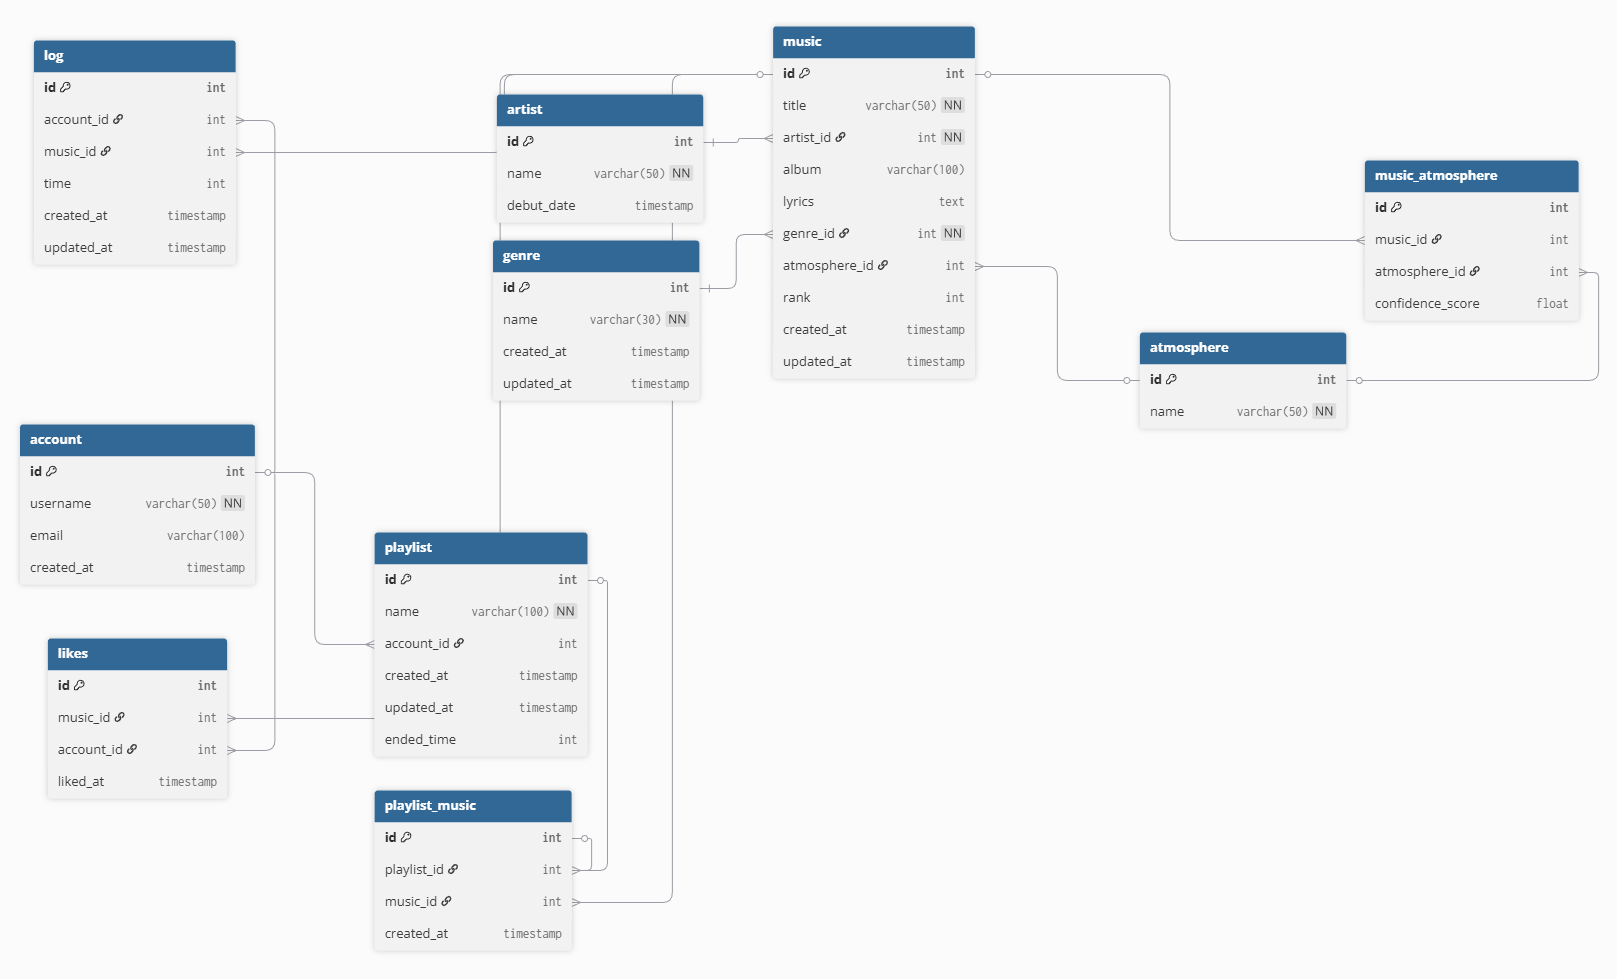

### 발라드 신곡

In [ ]:
import requests
from bs4 import BeautifulSoup
import time

<Response [200]>

In [ ]:
# 페이지별로 제목 크롤링
BASE_URL = "https://music.bugs.co.kr/newest/track/nb?page={}"

titles = []

for page in range(1, 10):  # 1~100 페이지
    url = BASE_URL.format(page)
    print(f"[크롤링 중] page={page}  →  {url}")

    res = requests.get(url)
    if res.status_code != 200:
        print(f"❌ 요청 실패 (status {res.status_code}) → 페이지 스킵")
        continue

    soup = BeautifulSoup(res.text, "html.parser")

    # p.title > a  구조만 가져오기
    for p in soup.select("p.title"):
        a_tag = p.select_one("a")
        if a_tag:
            title = a_tag.get("title")
            if title:
                titles.append(title.strip())

    # 요청 간 간격(서버 차단 방지)
    time.sleep(0.5)

print("\n=== 총 제목 개수 ===")
print(len(titles))

print("\n=== 일부 출력 ===")
for i, t in enumerate(titles[:20], 1):
    print(i, t)


[크롤링 중] page=1  →  https://music.bugs.co.kr/newest/track/nb?page=1
[크롤링 중] page=2  →  https://music.bugs.co.kr/newest/track/nb?page=2
[크롤링 중] page=3  →  https://music.bugs.co.kr/newest/track/nb?page=3
[크롤링 중] page=4  →  https://music.bugs.co.kr/newest/track/nb?page=4
[크롤링 중] page=5  →  https://music.bugs.co.kr/newest/track/nb?page=5
[크롤링 중] page=6  →  https://music.bugs.co.kr/newest/track/nb?page=6
[크롤링 중] page=7  →  https://music.bugs.co.kr/newest/track/nb?page=7
[크롤링 중] page=8  →  https://music.bugs.co.kr/newest/track/nb?page=8
[크롤링 중] page=9  →  https://music.bugs.co.kr/newest/track/nb?page=9

=== 총 제목 개수 ===
450

=== 일부 출력 ===
1 내가 나에게
2 터닝포인트
3 유난히 소란스럽던 (with 황정호)
4 보이지 않는 별빛
5 가면 (feat. 정우)
6 사랑부터 이별까지
7 이 노래가 끝나면
8 연연불망 (戀戀不忘) (feat. 나한국)
9 동화책의 이야기 같던
10 이별이 참 어색한 나라서
11 남은 조각
12 숨 (Vocal by 에디)
13 우연의 겹침
14 Winter like a Dream
15 오늘, 오늘, 오늘 (Feat. 박혜리)
16 우회
17 지친 하루 끝에
18 너에게
19 추억이 핀다
20 엄마별


In [15]:
# 페이지 별로 가수명 크롤링

BASE_URL = "https://music.bugs.co.kr/newest/track/nb?page={}"

artists = []

for page in range(1, 10):  # page=1 ~ 100
    url = BASE_URL.format(page)
    print(f"[크롤링 중] page={page} → {url}")

    res = requests.get(url)
    if res.status_code != 200:
        print(f"❌ 요청 실패(status {res.status_code}) → 페이지 스킵")
        continue

    soup = BeautifulSoup(res.text, "html.parser")

    # p.artist 구조에서 a[title]만 선택
    for p in soup.select("p.artist"):
        a_tag = p.select_one("a[title]")  # 진짜 가수 정보만
        if a_tag:
            artist = a_tag.get("title").strip()
            artists.append(artist)

    time.sleep(0.5)  # IP 차단 방지 딜레이

print("\n=== 총 가수명 개수 ===")
print(len(artists))

print("\n=== 일부 출력 ===")
for i, a in enumerate(artists[:20], 1):
    print(i, a)


[크롤링 중] page=1 → https://music.bugs.co.kr/newest/track/nb?page=1
[크롤링 중] page=2 → https://music.bugs.co.kr/newest/track/nb?page=2
[크롤링 중] page=3 → https://music.bugs.co.kr/newest/track/nb?page=3
[크롤링 중] page=4 → https://music.bugs.co.kr/newest/track/nb?page=4
[크롤링 중] page=5 → https://music.bugs.co.kr/newest/track/nb?page=5
[크롤링 중] page=6 → https://music.bugs.co.kr/newest/track/nb?page=6
[크롤링 중] page=7 → https://music.bugs.co.kr/newest/track/nb?page=7
[크롤링 중] page=8 → https://music.bugs.co.kr/newest/track/nb?page=8
[크롤링 중] page=9 → https://music.bugs.co.kr/newest/track/nb?page=9

=== 총 가수명 개수 ===
450

=== 일부 출력 ===
1 송영주
2 다미네
3 국화양 (Gukhwayang)
4 오보에
5 김희준
6 헬로봉주르(Hello Bonjour)
7 김동하
8 전초아
9 정두한
10 izi (오진성)
11 서서히
12 이세영
13 정미진
14 임요한(JL)
15 오후에 만난 성아
16 디투어 (Detour)
17 Rovi
18 민호
19 이은미
20 윤도현


In [17]:
# 페이지 별 앨범명 크롤링
BASE_URL = "https://music.bugs.co.kr/newest/track/nb?page={}"

albums = []

for page in range(1, 10):
    url = BASE_URL.format(page)
    print(f"[크롤링 중] page={page} → {url}")

    res = requests.get(url)
    if res.status_code != 200:
        print(f"❌ 요청 실패(status {res.status_code}) → 페이지 스킵")
        continue

    soup = BeautifulSoup(res.text, "html.parser")

    # 정확히 앨범명인 a.album[title]만 추출
    for a in soup.select("a.album[title]"):
        album_name = a.get("title").strip()
        albums.append(album_name)

    time.sleep(0.5)  # 차단 방지용 딜레이

print("\n=== 총 앨범명 개수 ===")
print(len(albums))

print("\n=== 일부 출력 ===")
for i, a in enumerate(albums[:20], 1):
    print(i, a)


[크롤링 중] page=1 → https://music.bugs.co.kr/newest/track/nb?page=1
[크롤링 중] page=2 → https://music.bugs.co.kr/newest/track/nb?page=2
[크롤링 중] page=3 → https://music.bugs.co.kr/newest/track/nb?page=3
[크롤링 중] page=4 → https://music.bugs.co.kr/newest/track/nb?page=4
[크롤링 중] page=5 → https://music.bugs.co.kr/newest/track/nb?page=5
[크롤링 중] page=6 → https://music.bugs.co.kr/newest/track/nb?page=6
[크롤링 중] page=7 → https://music.bugs.co.kr/newest/track/nb?page=7
[크롤링 중] page=8 → https://music.bugs.co.kr/newest/track/nb?page=8
[크롤링 중] page=9 → https://music.bugs.co.kr/newest/track/nb?page=9

=== 총 앨범명 개수 ===
439

=== 일부 출력 ===
1 내가 나에게
2 터닝포인트
3 쓰라림 2025ver.
4 보이지 않는 별빛
5 가면
6 사랑부터 이별까지
7 이 노래가 끝나면
8 연연불망 (戀戀不忘)
9 동화책의 이야기 같던
10 이별이 참 어색한 나라서
11 남은 조각
12 숨
13 우연의 겹침
14 Winter like a Dream
15 오늘, 오늘, 오늘
16 우회
17 지친 하루 끝에
18 너에게
19 추억이 핀다
20 언젠가 우리가 같은 별을 바라본다면 OST


In [28]:
# 가사 크롤링

BASE_URL = "https://music.bugs.co.kr/newest/track/nb?page={}"

track_urls = []
lyrics_list = []

# 1) 페이지 1~100까지 trackInfo 링크 크롤링
for page in range(1, 2):
    url = BASE_URL.format(page)
    print(f"[곡정보 링크 수집] page={page} → {url}")

    res = requests.get(url)
    if res.status_code != 200:
        print(f"❌ 요청 실패(status {res.status_code}) → 페이지 스킵")
        continue

    soup = BeautifulSoup(res.text, "html.parser")

    # trackInfo 링크들만 가져오기 (a.trackInfo)
    for a in soup.select("a.trackInfo[href]"):
        track_url = a.get("href")
        track_urls.append(track_url)

    time.sleep(0.3)

print(f"\n총 trackInfo 링크 수집: {len(track_urls)}개")

# 2) 각 trackInfo 페이지에서 가사(xmp) 추출
for idx, t_url in enumerate(track_urls, 1):
    print(f"[가사 크롤링] {idx}/{len(track_urls)} → {t_url}")

    res2 = requests.get(t_url)
    if res2.status_code != 200:
        print(f"❌ 요청 실패: {t_url}")
        lyrics_list.append("")  # 실패 시 빈 문자열
        continue

    soup2 = BeautifulSoup(res2.text, "html.parser")

    xmp_tag = soup2.select_one("xmp")
    if xmp_tag:
        lyrics = xmp_tag.text.strip()
    else:
        lyrics = ""  # 가사 없는 경우

    lyrics_list.append(lyrics)

    time.sleep(0.3)  # 차단 방지

# 3) 일부 가사 출력
print("\n=== 가사 예시 ===")
for i, l in enumerate(lyrics_list[:3], 1):
    print(f"\n[{i}] -----------------------\n{l[:300]}...")


[곡정보 링크 수집] page=1 → https://music.bugs.co.kr/newest/track/nb?page=1

총 trackInfo 링크 수집: 50개
[가사 크롤링] 1/50 → https://music.bugs.co.kr/track/33744135?wl_ref=list_tr_08
[가사 크롤링] 2/50 → https://music.bugs.co.kr/track/33744134?wl_ref=list_tr_08
[가사 크롤링] 3/50 → https://music.bugs.co.kr/track/33743902?wl_ref=list_tr_08
[가사 크롤링] 4/50 → https://music.bugs.co.kr/track/33742962?wl_ref=list_tr_08
[가사 크롤링] 5/50 → https://music.bugs.co.kr/track/33742787?wl_ref=list_tr_08
[가사 크롤링] 6/50 → https://music.bugs.co.kr/track/33741682?wl_ref=list_tr_08
[가사 크롤링] 7/50 → https://music.bugs.co.kr/track/33741680?wl_ref=list_tr_08
[가사 크롤링] 8/50 → https://music.bugs.co.kr/track/33740226?wl_ref=list_tr_08
[가사 크롤링] 9/50 → https://music.bugs.co.kr/track/33739973?wl_ref=list_tr_08
[가사 크롤링] 10/50 → https://music.bugs.co.kr/track/33735951?wl_ref=list_tr_08
[가사 크롤링] 11/50 → https://music.bugs.co.kr/track/33735910?wl_ref=list_tr_08
[가사 크롤링] 12/50 → https://music.bugs.co.kr/track/33698393?wl_ref=list_tr_08
[가사 크롤링] 13/50 →

In [34]:
import pandas as pd

# 모든 리스트 길이가 동일한지 체크 (안 맞으면 크롤링 과정 다시 확인)
n = min(len(titles), len(artists), len(albums), len(lyrics_list))

music_df = pd.DataFrame({
    "title": titles[:n],
    "artist": artists[:n],
    "album": albums[:n],
    "lyrics": lyrics_list[:n],
    "genre": ["발라드"] * n
})

print(music_df.head())
print("\n=== 총 데이터 개수 ===", len(music_df))


                  title            artist         album  \
0                내가 나에게               송영주        내가 나에게   
1                 터닝포인트               다미네         터닝포인트   
2  유난히 소란스럽던 (with 황정호)  국화양 (Gukhwayang)  쓰라림 2025ver.   
3             보이지 않는 별빛               오보에     보이지 않는 별빛   
4         가면 (feat. 정우)               김희준            가면   

                                              lyrics genre  
0  깊은 어둠 속\n끝이 없을 것 같던 길\n두려움에도\n나는 빛을 놓지 않았어\n\n...   발라드  
1  어제보다 더 자란 너\n예쁘고 참 대견하고\n투정도 웃음도 모두\n넌 내 기쁨이야\...   발라드  
2  시간은 빨라져만 가는데 \n난 또 다시 제자리 걸음질을 하네요\n아름답지 않은 표현...   발라드  
3  무더운 이 여름밤에 나는 지쳐가고\n잠 못 이루는 침대를 벗어나\n집 밖으로 나섰어...   발라드  
4  나에겐 엄청 두꺼운 가면이 있어\n그 뒤엔 한 아이가 매일 울고 있어\n\n점점 희...   발라드  

=== 총 데이터 개수 === 50


In [35]:
music_df.head()

,title,artist,album,lyrics,genre
0,내가 나에게,송영주,내가 나에게,깊은 어둠 속\n끝이 없을 것 같던 길\n두려움에도\n나는 빛을 놓지 않았어\n\n...,발라드
1,터닝포인트,다미네,터닝포인트,어제보다 더 자란 너\n예쁘고 참 대견하고\n투정도 웃음도 모두\n넌 내 기쁨이야\...,발라드
2,유난히 소란스럽던 (with 황정호),국화양 (Gukhwayang),쓰라림 2025ver.,시간은 빨라져만 가는데 \n난 또 다시 제자리 걸음질을 하네요\n아름답지 않은 표현...,발라드
3,보이지 않는 별빛,오보에,보이지 않는 별빛,무더운 이 여름밤에 나는 지쳐가고\n잠 못 이루는 침대를 벗어나\n집 밖으로 나섰어...,발라드
4,가면 (feat. 정우),김희준,가면,나에겐 엄청 두꺼운 가면이 있어\n그 뒤엔 한 아이가 매일 울고 있어\n\n점점 희...,발라드


### 총정리 - 크롤링

In [1]:
pip install feedparser==6.0.11 kafka-python==2.0.2 apache-flink==1.20.0 beautifulsoup4==4.13.3 pydantic==2.10.6 psycopg2-binary==2.9.10 python-dotenv==1.0.1 tiktoken==0.8.0 pyspark==3.5.4 matplotlib==3.10.0 hdfs==2.7.3 elasticsearch==8.17.1

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import time

#############################################
# 1. 장르 코드 → 장르명 매핑
#############################################

GENRE_MAP = {
    "nb": "발라드",
    "ndp": "댄스/팝",
    "nfa": "포크/어쿠스틱",
    "nid": "아이돌",
    "nrh": "랩/힙합",
    "nrs": "알앤비/소울",
    "nkelec": "일렉트로닉",
    "nkrock": "락/메탈",
    "nkjazz": "재즈",
    "nindie": "인디",
    "ntrot": "성인가요",
}

BASE_URL = "https://music.bugs.co.kr/newest/track/{genre_code}?page={page}"

#############################################
# 2. 개별 트랙 페이지 → 가사(xmp) 추출 함수
#############################################

def get_lyrics(track_url):
    try:
        res = requests.get(track_url, timeout=10)
        if res.status_code != 200:
            return ""
        soup = BeautifulSoup(res.text, "html.parser")
        xmp = soup.select_one("xmp")
        return xmp.text.strip() if xmp else ""
    except:
        return ""

#############################################
# 3. 특정 장르의 1~100 페이지 크롤링 함수
#############################################

def crawl_genre(genre_code, genre_name, max_page=1):

    titles = []
    artists = []
    albums = []
    lyrics_list = []
    genres = []

    for page in range(1, max_page + 1):
        url = BASE_URL.format(genre_code=genre_code, page=page)
        print(f"[{genre_name}] page={page} 수집 중 → {url}")

        res = requests.get(url)
        if res.status_code != 200:
            print(f"❌ 페이지 접근 실패: {url}")
            continue

        soup = BeautifulSoup(res.text, "html.parser")

        # --- 제목 ---
        for p in soup.select("p.title"):
            a = p.select_one("a[title]")
            if a:
                titles.append(a.get("title").strip())

        # --- 가수 ---
        for p in soup.select("p.artist"):
            a = p.select_one("a[title]")
            if a:
                artists.append(a.get("title").strip())

        # --- 앨범명 ---
        for a in soup.select("a.album[title]"):
            albums.append(a.get("title").strip())

        # --- trackInfo → 가사 링크 ---
        track_urls = [a.get("href") for a in soup.select("a.trackInfo[href]")]
        
        # 가사 크롤링
        for t_url in track_urls:
            lyrics = get_lyrics(t_url)
            lyrics_list.append(lyrics)
            time.sleep(0.2)

        time.sleep(0.3)  # 서버 차단 방지

    # 리스트 길이 동기화
    min_len = min(len(titles), len(artists), len(albums), len(lyrics_list))

    df = pd.DataFrame({
        "title": titles[:min_len],
        "artist": artists[:min_len],
        "album": albums[:min_len],
        "lyrics": lyrics_list[:min_len],
        "genre": [genre_name] * min_len
    })

    return df


#############################################
# 4. 전체 장르 반복 → 하나의 DataFrame으로 합치기
#############################################

all_dfs = []

for genre_code, genre_name in GENRE_MAP.items():
    print(f"\n===============================")
    print(f" 장르 크롤링 시작: {genre_name} ({genre_code})")
    print(f"===============================\n")

    df_genre = crawl_genre(genre_code, genre_name, max_page=1)
    all_dfs.append(df_genre)

# 전체 하나로 합치기
final_df = pd.concat(all_dfs, ignore_index=True)

#############################################
# 5. 결과 출력
#############################################

print("\n\n===== 전체 크롤링 완료 =====")
print(final_df.head())
print(f"\n총 데이터 개수: {len(final_df)}")

# 필요하면 CSV 저장
# final_df.to_csv("bugs_all_genre_tracks.csv", encoding="utf-8-sig", index=False)



 장르 크롤링 시작: 발라드 (nb)

[발라드] page=1 수집 중 → https://music.bugs.co.kr/newest/track/nb?page=1

 장르 크롤링 시작: 댄스/팝 (ndp)

[댄스/팝] page=1 수집 중 → https://music.bugs.co.kr/newest/track/ndp?page=1

 장르 크롤링 시작: 포크/어쿠스틱 (nfa)

[포크/어쿠스틱] page=1 수집 중 → https://music.bugs.co.kr/newest/track/nfa?page=1

 장르 크롤링 시작: 아이돌 (nid)

[아이돌] page=1 수집 중 → https://music.bugs.co.kr/newest/track/nid?page=1

 장르 크롤링 시작: 랩/힙합 (nrh)

[랩/힙합] page=1 수집 중 → https://music.bugs.co.kr/newest/track/nrh?page=1

 장르 크롤링 시작: 알앤비/소울 (nrs)

[알앤비/소울] page=1 수집 중 → https://music.bugs.co.kr/newest/track/nrs?page=1

 장르 크롤링 시작: 일렉트로닉 (nkelec)

[일렉트로닉] page=1 수집 중 → https://music.bugs.co.kr/newest/track/nkelec?page=1

 장르 크롤링 시작: 락/메탈 (nkrock)

[락/메탈] page=1 수집 중 → https://music.bugs.co.kr/newest/track/nkrock?page=1

 장르 크롤링 시작: 재즈 (nkjazz)

[재즈] page=1 수집 중 → https://music.bugs.co.kr/newest/track/nkjazz?page=1

 장르 크롤링 시작: 인디 (nindie)

[인디] page=1 수집 중 → https://music.bugs.co.kr/newest/track/nindie?page=1

 장르 크롤링 시작: 성인가요 (ntrot)

[

In [3]:
music_df = final_df.copy()
music_df.head()

,title,artist,album,lyrics,genre
0,내가 나에게,송영주,내가 나에게,깊은 어둠 속\n끝이 없을 것 같던 길\n두려움에도\n나는 빛을 놓지 않았어\n\n...,발라드
1,터닝포인트,다미네,터닝포인트,어제보다 더 자란 너\n예쁘고 참 대견하고\n투정도 웃음도 모두\n넌 내 기쁨이야\...,발라드
2,유난히 소란스럽던 (with 황정호),국화양 (Gukhwayang),쓰라림 2025ver.,시간은 빨라져만 가는데 \n난 또 다시 제자리 걸음질을 하네요\n아름답지 않은 표현...,발라드
3,보이지 않는 별빛,오보에,보이지 않는 별빛,무더운 이 여름밤에 나는 지쳐가고\n잠 못 이루는 침대를 벗어나\n집 밖으로 나섰어...,발라드
4,가면 (feat. 정우),김희준,가면,나에겐 엄청 두꺼운 가면이 있어\n그 뒤엔 한 아이가 매일 울고 있어\n\n점점 희...,발라드


### 가사 기반 분위기 파악 by 모델

Defaulting to user installation because normal site-packages is not writeable
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.0/12.0 MB 48.8 MB/s eta 0:00:0000:010:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 26.2 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 566.1/566.1 KB 48.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 72.9 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 485.8/485.8 KB 56.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 KB 17.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 69.3 MB/s eta 0:00:00:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 201.0/201.0 KB 45.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [12]:
## 성능 안좋은데, 빠르긴 함
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch

model_id = "SamLowe/roberta-base-go_emotions"
tokenizer = AutoTokenizer.from_pretrained(model_id)
model = AutoModelForSequenceClassification.from_pretrained(model_id)

def get_emotion(text):
    inputs = tokenizer(text, return_tensors="pt", truncation=True, padding=True)
    with torch.no_grad():
        logits = model(**inputs).logits
    probs = torch.softmax(logits, dim=-1)
    label_id = torch.argmax(probs).item()
    return model.config.id2label[label_id]

music_df['atmosphere'] = music_df['lyrics'].apply(get_emotion)
music_df.head()

'''
emotion 
neutral 469 
love 17 
sadness 10 
curiosity 8 
desire 6 
confusion 4 
annoyance 4 
remorse 4 
approval 3 
joy 3 
disappointment 3 
gratitude 3 
anger 2 
admiration 1 
disapproval 1 
caring 1 
Name: count, dtype: int64
'''

ImportError: 
AutoModelForSequenceClassification requires the PyTorch library but it was not found in your environment. Check out the instructions on the
installation page: https://pytorch.org/get-started/locally/ and follow the ones that match your environment.
Please note that you may need to restart your runtime after installation.


In [ ]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM
from transformers import AutoTokenizer as EmoTokenizer
from transformers import AutoModelForSequenceClassification
import torch

###############################################
# 1) 한국어 → 영어 번역 모델
###############################################
trans_model_id = "Helsinki-NLP/opus-mt-ko-en"
trans_tokenizer = AutoTokenizer.from_pretrained(trans_model_id)
trans_model = AutoModelForSeq2SeqLM.from_pretrained(trans_model_id)

def translate_to_en(text):
    if not isinstance(text, str) or len(text.strip()) == 0:
        return ""
    inputs = trans_tokenizer(text, return_tensors="pt", truncation=True)
    outputs = trans_model.generate(**inputs)
    return trans_tokenizer.decode(outputs[0], skip_special_tokens=True)


###############################################
# 2) 영어 감정 분석 모델
###############################################
emo_model_id = "SamLowe/roberta-base-go_emotions"
emo_tokenizer = EmoTokenizer.from_pretrained(emo_model_id)
emo_model = AutoModelForSequenceClassification.from_pretrained(emo_model_id)

def emotion_en(text_en):
    inputs = emo_tokenizer(text_en, return_tensors="pt", truncation=True)
    with torch.no_grad():
        logits = emo_model(**inputs).logits
    return emo_model.config.id2label[torch.argmax(logits).item()]


###############################################
# 3) 한국어 가사 → 분위기 분석
###############################################
def get_atmosphere(text_ko):
    text_en = translate_to_en(text_ko)
    return emotion_en(text_en)


###############################################
# 4) DataFrame 적용
###############################################
music_df['atmosphere'] = music_df['lyrics'].apply(get_atmosphere)
print(music_df['atmosphere'].value_counts())

########################################################
# 모델 돌아가는데 67분 걸림
'''
neutral           293
love               89
sadness            20
confusion          19
joy                16
desire             13
curiosity          11
admiration         10
disapproval         8
anger               8
approval            7
disappointment      7
realization         6
amusement           6
caring              5
annoyance           5
gratitude           4
fear                4
optimism            3
nervousness         2
excitement          2
remorse             1
Name: count, dtype: int64
'''

c:\Users\SSAFY\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\SSAFY\.cache\huggingface\hub\models--Helsinki-NLP--opus-mt-ko-en. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
c:\Users\SSAFY\AppData\Local\Programs\Python\Python311\Lib\site-packages\transformers\m

atmosphere
neutral           293
love               89
sadness            20
confusion          19
joy                16
desire             13
curiosity          11
admiration         10
disapproval         8
anger               8
approval            7
disappointment      7
realization         6
amusement           6
caring              5
annoyance           5
gratitude           4
fear                4
optimism            3
nervousness         2
excitement          2
remorse             1
Name: count, dtype: int64


In [76]:
music_df.drop(['emotion'], axis=1, inplace=True)

In [80]:
# 감정 → 음악 분위기 매핑
emotion_to_mood = {
    "joy": "밝음",
    "amusement": "밝음",
    "gratitude": "밝음",
    "admiration": "밝음",
    "optimism": "밝음",

    "excitement": "신남",
    "desire": "신남",

    "neutral": "잔잔함",
    "caring": "잔잔함",
    "approval": "잔잔함",
    "realization": "잔잔함",

    "love": "로맨틱",

    "sadness": "슬픔",
    "remorse": "슬픔",

    "confusion": "우울/혼란",
    "fear": "우울/혼란",
    "nervousness": "우울/혼란",
    "disappointment": "우울/혼란",

    "anger": "분노/공격적",
    "annoyance": "분노/공격적",
    "disapproval": "분노/공격적"
}

# 새로운 분위기 컬럼 생성
music_df['mood'] = music_df['atmosphere'].map(emotion_to_mood)

# 확인
print(music_df[['atmosphere', 'atmosphere_kor', 'mood']].head())

       atmosphere atmosphere_kor   mood
0  disappointment             실망  우울/혼란
1            love             사랑    로맨틱
2         neutral             중립    잔잔함
3         neutral             중립    잔잔함
4         sadness             슬픔     슬픔


In [18]:
music_df['atmosphere'] = '밝음'

music_df


,title,artist,album,lyrics,genre,atmosphere
0,내가 나에게,송영주,내가 나에게,깊은 어둠 속\n끝이 없을 것 같던 길\n두려움에도\n나는 빛을 놓지 않았어\n\n...,발라드,밝음
1,터닝포인트,다미네,터닝포인트,어제보다 더 자란 너\n예쁘고 참 대견하고\n투정도 웃음도 모두\n넌 내 기쁨이야\...,발라드,밝음
2,유난히 소란스럽던 (with 황정호),국화양 (Gukhwayang),쓰라림 2025ver.,시간은 빨라져만 가는데 \n난 또 다시 제자리 걸음질을 하네요\n아름답지 않은 표현...,발라드,밝음
3,보이지 않는 별빛,오보에,보이지 않는 별빛,무더운 이 여름밤에 나는 지쳐가고\n잠 못 이루는 침대를 벗어나\n집 밖으로 나섰어...,발라드,밝음
4,가면 (feat. 정우),김희준,가면,나에겐 엄청 두꺼운 가면이 있어\n그 뒤엔 한 아이가 매일 울고 있어\n\n점점 희...,발라드,밝음
...,...,...,...,...,...,...
534,추애(秋愛) (Autumn Love),박재관 (PAJAE),추애 (Autumn Love),당신은\n요새도 두륜산이 보이는 툇마루에 앉아\n가만히 슬픈가요\n나는 멀리 지리산...,성인가요,밝음
535,남자의 약속,이희존,이희존 1집 My Dream,그렇게 힘이 들었나요\n내 앞에 울지 못하고\n돌아선 당신 눈물에\n내 가슴도 따라...,성인가요,밝음
536,꽃길이 된 당신,양연화,꽃길이 된 당신,사랑 그 향기가 가슴에 물들어오면\n가믐뒤에 비를 만난 것처럼 활짝 피어나는 꽃 \...,성인가요,밝음
537,가을이 오네,임경화,가을이 오네,서늘한 바람이 불면 벌써 가을이 오려나 \n설레는 마음은 언제나 내 손끝을 스치는데...,성인가요,밝음


In [16]:
pip install pip install feedparser==6.0.11 kafka-python==2.0.2 apache-flink==1.20.0 beautifulsoup4==4.13.3 pydantic==2.10.6 psycopg2-binary==2.9.10 python-dotenv==1.0.1 tiktoken==0.8.0 pyspark==3.5.4 matplotlib==3.10.0 hdfs==2.7.3 elasticsearch==8.17.1


Defaulting to user installation because normal site-packages is not writeable
ERROR: Could not find a version that satisfies the requirement install (from versions: none)
ERROR: No matching distribution found for install
Note: you may need to restart the kernel to use updated packages.


In [19]:
import psycopg2

conn = psycopg2.connect(
    host="localhost",
    dbname="music_pjt",
    user="ssafyuser",
    password="ssafy"
)
cur = conn.cursor()

In [26]:
artists = music_df['artist'].unique()

for a in artists:
    cur.execute("""
        INSERT INTO artist (name)
        VALUES (%s)
        ON CONFLICT (name) DO NOTHING;
    """, (a,))
conn.commit()

In [27]:
genres = music_df['genre'].unique()

for g in genres:
    cur.execute("""
        INSERT INTO genre (name)
        VALUES (%s)
        ON CONFLICT (name) DO NOTHING;
    """, (g,))
conn.commit()

In [28]:
moods = music_df['atmosphere'].unique()

for m in moods:
    cur.execute("""
        INSERT INTO atmosphere (name)
        VALUES (%s)
        ON CONFLICT (name) DO NOTHING;
    """, (m,))
conn.commit()

In [29]:
# -----------------------------------------------
# 5) MUSIC 테이블 삽입
# -----------------------------------------------
for idx, row in music_df.iterrows():

    # artist_id 조회
    cur.execute("SELECT id FROM artist WHERE name = %s", (row['artist'],))
    artist_id = cur.fetchone()[0]

    # genre_id 조회
    cur.execute("SELECT id FROM genre WHERE name = %s", (row['genre'],))
    genre_id = cur.fetchone()[0]

    # music 삽입
    cur.execute("""
        INSERT INTO music (title, artist_id, album, lyrics, genre_id)
        VALUES (%s, %s, %s, %s, %s)
        RETURNING id;
    """, (row['title'], artist_id, row['album'], row['lyrics'], genre_id))

    music_id = cur.fetchone()[0]

    # atmosphere_id 조회
    cur.execute("SELECT id FROM atmosphere WHERE name = %s", (row['atmosphere'],))
    atmosphere_id = cur.fetchone()[0]

    # music_atmosphere에 매핑 (confidence score는 1.0으로 기본 설정)
    cur.execute("""
        INSERT INTO music_atmosphere (music_id, atmosphere_id, confidence_score)
        VALUES (%s, %s, %s)
    """, (music_id, atmosphere_id, 1.0))

In [30]:

conn.commit()

cur.close()
conn.close()